In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [5]:
data = pd.read_csv('rfe_dataset_10.csv')

In [6]:
X = data.drop('Class', axis = 1)
y = data[['Class']]

# Podela podataka na trening i test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42, stratify = y)

# Pravljenje modela i treniranje

In [8]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

In [9]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

# Evaluacija modela

In [10]:
y_train_pred = bagging.predict(X_train)
y_test_pred = bagging.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

In [11]:
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy - train set: {:.2f}%".format(accuracy * 100))

Accuracy - train set: 99.00%


In [12]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy - test set: {:.2f}%".format(accuracy * 100))

Accuracy - test set: 92.31%


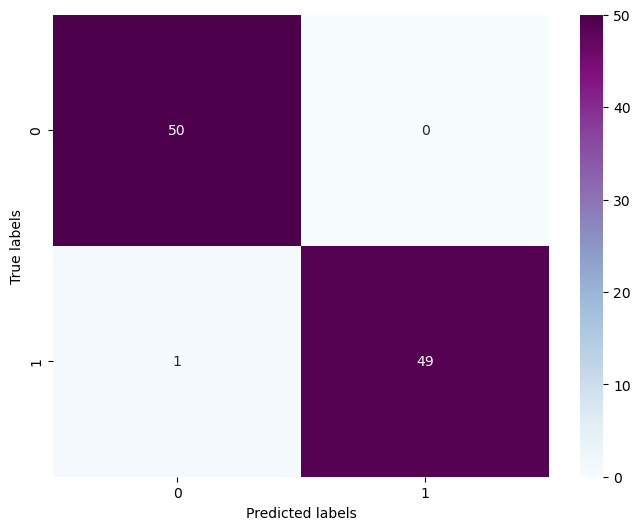

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt='g', cmap='BuPu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

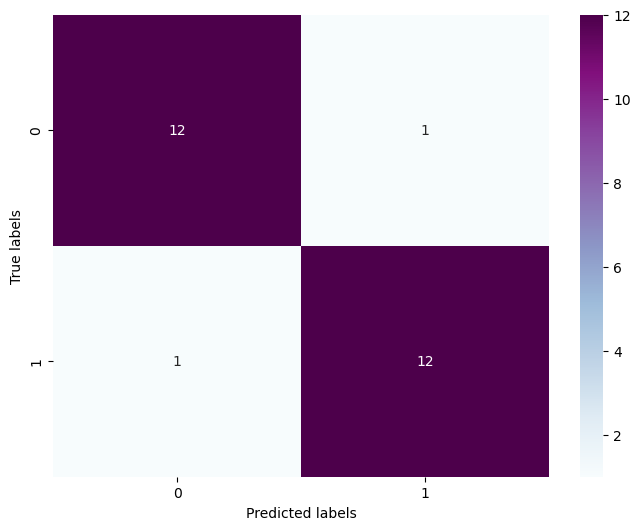

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='BuPu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [15]:
y_train_prob = bagging.predict_proba(X_train)[:,1]
y_test_prob = bagging.predict_proba(X_test)[:,1]

In [16]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

In [17]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

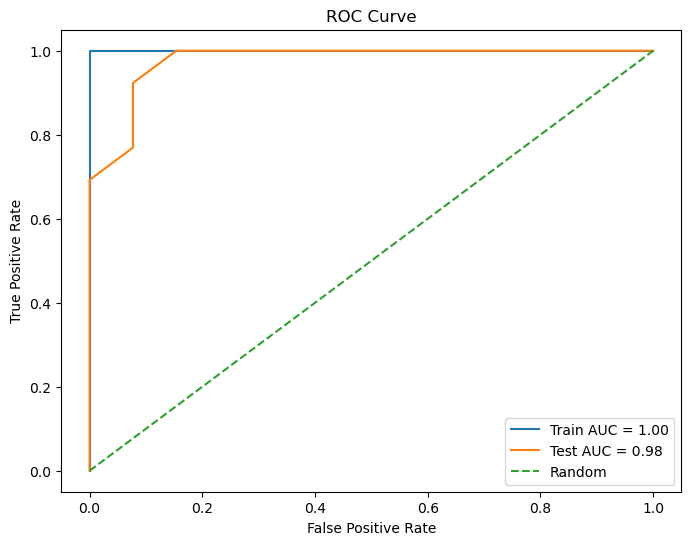

In [18]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()